In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# Read the CSV file
df = pd.read_csv('Heart_Attack.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In [2]:
# Display basic information about the dataset
print("Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
Number of rows: 1763
Number of columns: 12

Data Types:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object

Missing Values:
age                0
sex                0
Chest pain type    0
trestbps           0
cholesterol        0
                  ..
max heart rate     0
exercise angina    0
oldpeak            0
ST slope           0
target             0
Length: 12, dtype: int64


In [3]:
# Statistical summary of the dataset
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.952921,0.736245,3.039138,131.950085,222.625638,0.192286,0.798071,142.952921,0.368123,0.962337,1.442428,0.656835
std,9.267101,0.440793,1.023642,18.154333,90.119674,0.394208,0.923926,25.150727,0.482432,1.109458,0.722159,0.601448
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,199.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,234.000000,0.000000,0.000000,145.000000,0.000000,0.600000,1.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,2.000000


Check for unusual values:
Cholesterol min: 0, max: 603
Blood pressure min: 0, max: 200
Max heart rate min: 60, max: 202


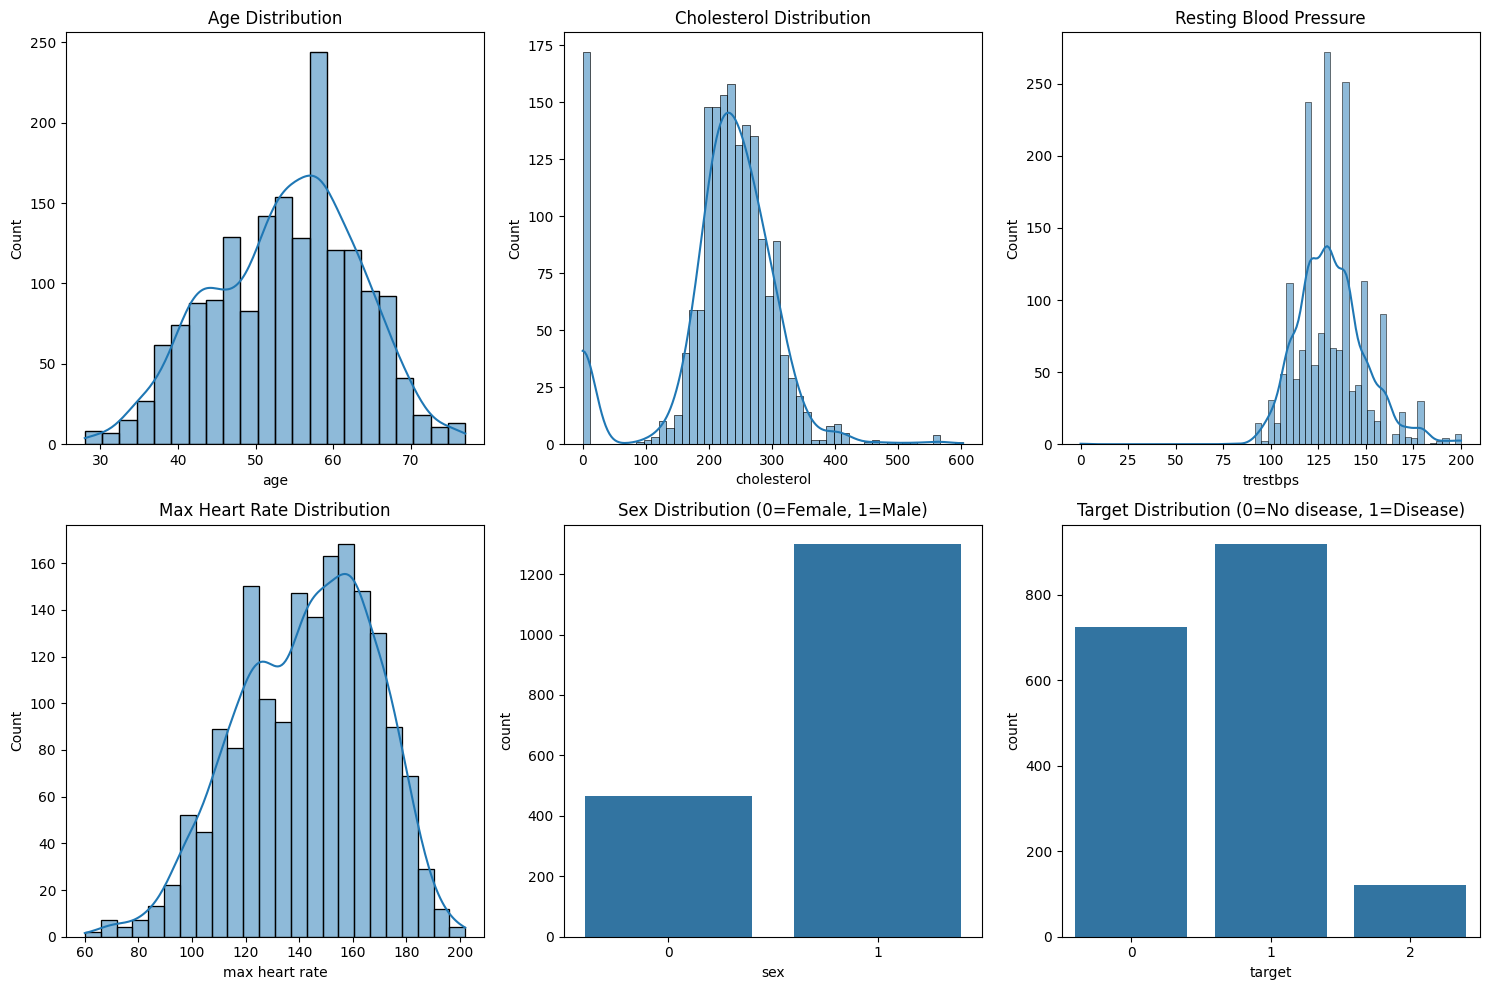

In [4]:
# Check for any unusual values (zeros, negatives) in key medical metrics
print("Check for unusual values:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")
print(f"Max heart rate min: {df['max heart rate'].min()}, max: {df['max heart rate'].max()}")

# Plot distributions of key features
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure')

plt.subplot(2, 3, 4)
sns.histplot(df['max heart rate'], kde=True)
plt.title('Max Heart Rate Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (0=Female, 1=Male)')

plt.subplot(2, 3, 6)
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0=No disease, 1=Disease)')

plt.tight_layout()
plt.show()

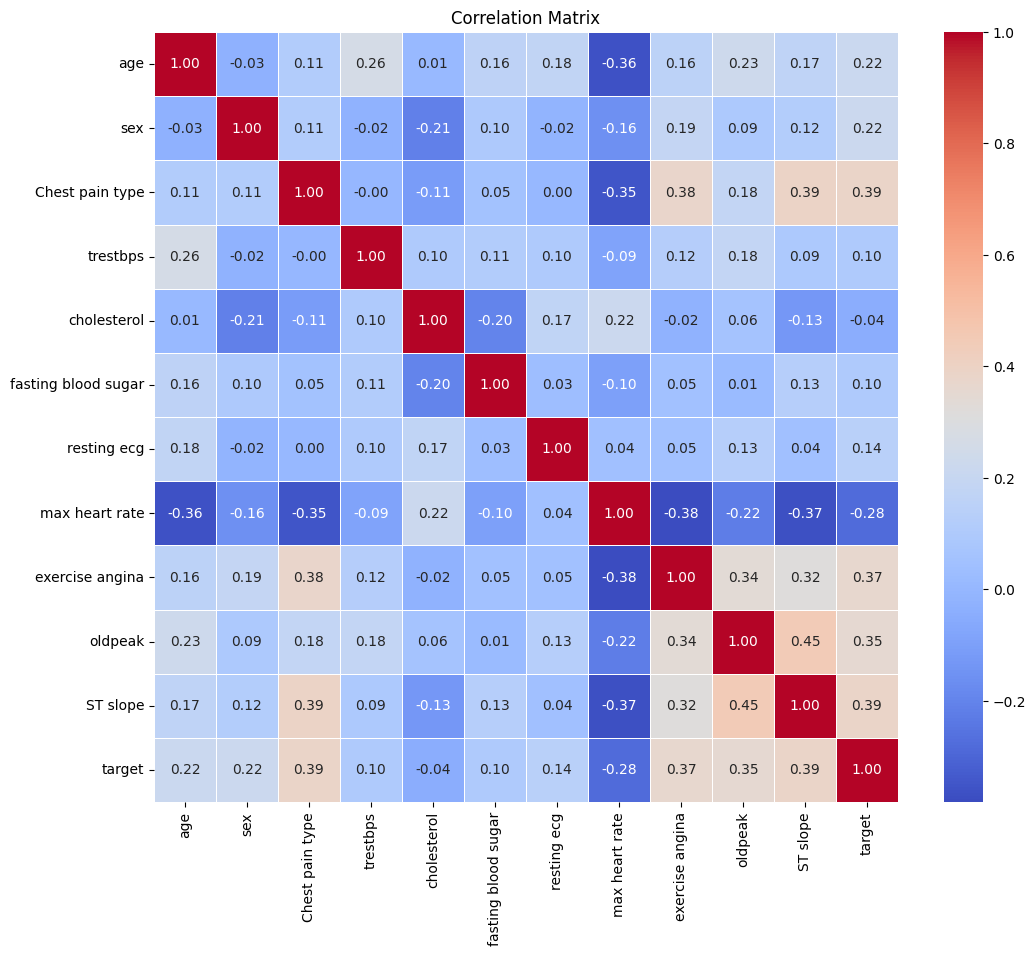

Target Class Distribution:
target
1    918
0    725
2    120
Name: count, dtype: int64
Class Balance: target
1    0.520703
0    0.411231
2    0.068066
Name: proportion, dtype: float64


In [5]:
# Check correlations between features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Check class distribution
print("Target Class Distribution:")
print(df['target'].value_counts())
print(f"Class Balance: {df['target'].value_counts(normalize=True)}")

# Data Cleaning Process

From our exploratory data analysis, we've identified several issues that need addressing:

1. **Zero values in cholesterol and blood pressure**: These are likely errors since these metrics can't be zero in living patients.
2. **Outliers in cholesterol**: There are some very high values (up to 603) that might be outliers.
3. **No missing values**: The dataset appears to be complete, so we don't need to handle missing values.
4. **Target has 3 classes**: We have 0, 1, and 2 values in the target column. We'll keep this as is, but it's important to note that this is a multi-class classification problem.

Let's clean these issues one by one.

In [6]:
# Step 1: Handle duplicates
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Before removing duplicates: (1763, 12)
After removing duplicates: (1491, 12)


In [7]:
# Step 2: Handle zero values in medical metrics
# First, let's see how many zeros we have in each column
print("Number of zeros in key medical columns:")
print(f"Cholesterol: {(df['cholesterol'] == 0).sum()}")
print(f"Blood pressure (trestbps): {(df['trestbps'] == 0).sum()}")

# Replace zeros in cholesterol with the median (medical metrics can't be zero)
median_cholesterol = df[df['cholesterol'] > 0]['cholesterol'].median()
df['cholesterol'] = df['cholesterol'].replace(0, median_cholesterol)

# Replace zeros in blood pressure with the median
median_trestbps = df[df['trestbps'] > 0]['trestbps'].median()
df['trestbps'] = df['trestbps'].replace(0, median_trestbps)

# Verify the replacements
print("\nAfter replacement:")
print(f"Cholesterol min: {df['cholesterol'].min()}, max: {df['cholesterol'].max()}")
print(f"Blood pressure min: {df['trestbps'].min()}, max: {df['trestbps'].max()}")

Number of zeros in key medical columns:
Cholesterol: 172
Blood pressure (trestbps): 1

After replacement:
Cholesterol min: 85, max: 603
Blood pressure min: 80, max: 200


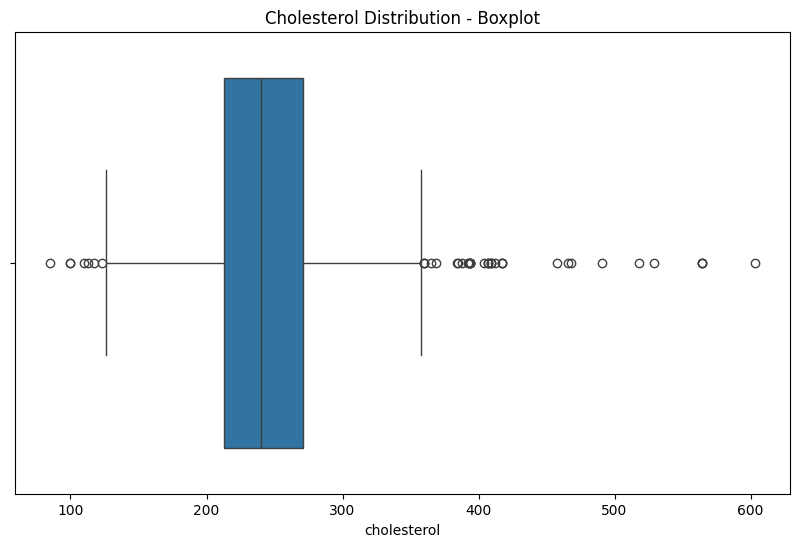

Cholesterol Statistics:
95th percentile: 330.0
99th percentile: 409.0
Max value: 603

After capping outliers, cholesterol max: 409


In [8]:
# Step 3: Handle outliers
# For cholesterol, values above 500 are rare and may be outliers
# Let's examine the cholesterol distribution with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cholesterol'])
plt.title('Cholesterol Distribution - Boxplot')
plt.show()

# Calculate statistics for cholesterol
print("Cholesterol Statistics:")
print(f"95th percentile: {df['cholesterol'].quantile(0.95)}")
print(f"99th percentile: {df['cholesterol'].quantile(0.99)}")
print(f"Max value: {df['cholesterol'].max()}")

# Let's cap cholesterol values at the 99th percentile
cholesterol_cap = df['cholesterol'].quantile(0.99)
df['cholesterol'] = df['cholesterol'].clip(upper=cholesterol_cap)

# Verify the change
print(f"\nAfter capping outliers, cholesterol max: {df['cholesterol'].max()}")

In [9]:
# Step 4: Check data types and ensure consistency
# Let's look at the data types of all columns
print("Data types before conversion:")
print(df.dtypes)

# The data already seems to be in numeric format, but let's check the unique values
# to make sure they're properly encoded
print("\nUnique values in categorical columns:")
categorical_cols = ['sex', 'Chest pain type', 'resting ecg', 'exercise angina', 'ST slope']
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")

# No need for encoding since all values are already numeric
# But we should document what the numeric values mean
print("\nCategorical columns interpretation:")
print("sex: 0 = Female, 1 = Male")
print("Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)")
print("resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)")
print("exercise angina: 0 = No, 1 = Yes")
print("ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)")
print("target: 0 = No disease, 1 = Disease, 2 = Severe disease")

Data types before conversion:
age                  int64
sex                  int64
Chest pain type      int64
trestbps             int64
cholesterol          int64
                    ...   
max heart rate       int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
Length: 12, dtype: object

Unique values in categorical columns:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3, 4]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2, 3]

Categorical columns interpretation:
sex: 0 = Female, 1 = Male
Chest pain type: Values 0-3 (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)
resting ecg: Values 0-2 (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
exercise angina: 0 = No, 1 = Yes
ST slope: Values 0-2 (0: Upsloping, 1: Flat, 2: Downsloping)
target: 0 = No disease, 1 = Disease, 2 = Severe disease


In [10]:
# Step 5: Handle inconsistent categorical values
# Check how many records have these unexpected values
print("Records with unexpected category values:")
print(f"Chest pain type = 4: {(df['Chest pain type'] == 4).sum()}")
print(f"ST slope = 3: {(df['ST slope'] == 3).sum()}")

# Replace these with the most common value in each column (mode)
if (df['Chest pain type'] == 4).sum() > 0:
    mode_chest_pain = df[df['Chest pain type'] != 4]['Chest pain type'].mode()[0]
    df.loc[df['Chest pain type'] == 4, 'Chest pain type'] = mode_chest_pain
    print(f"Replaced Chest pain type 4 with {mode_chest_pain}")

if (df['ST slope'] == 3).sum() > 0:
    mode_st_slope = df[df['ST slope'] != 3]['ST slope'].mode()[0]
    df.loc[df['ST slope'] == 3, 'ST slope'] = mode_st_slope
    print(f"Replaced ST slope 3 with {mode_st_slope}")

# Verify the changes
print("\nAfter fixing inconsistent values:")
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")

Records with unexpected category values:
Chest pain type = 4: 625
ST slope = 3: 81
Replaced Chest pain type 4 with 3
Replaced ST slope 3 with 1

After fixing inconsistent values:
sex: [0, 1]
Chest pain type: [0, 1, 2, 3]
resting ecg: [0, 1, 2]
exercise angina: [0, 1]
ST slope: [0, 1, 2]


Final Data Validation:
Number of rows in cleaned dataset: 1491
Number of columns: 12
Missing values: 0
Cholesterol range: 85 - 409
Blood pressure range: 80 - 200


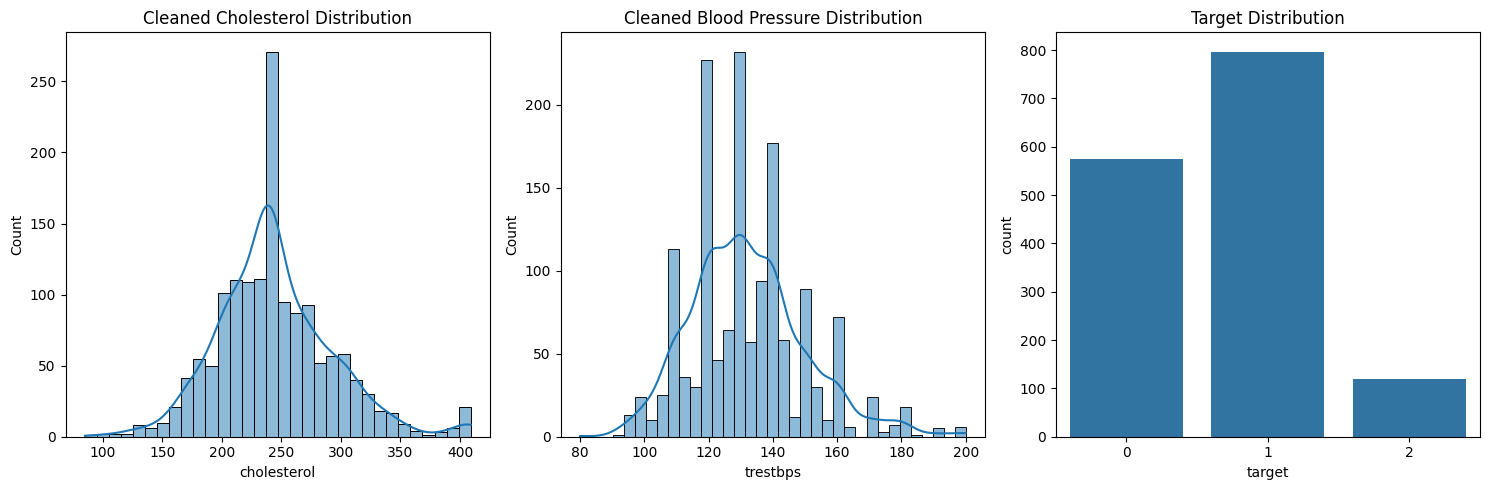


Final Cleaned Dataset:


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,3,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,409,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,3,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In [11]:
# Step 6: Final data validation
# Let's check that all our cleaning steps have been applied properly
print("Final Data Validation:")
print(f"Number of rows in cleaned dataset: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Cholesterol range: {df['cholesterol'].min()} - {df['cholesterol'].max()}")
print(f"Blood pressure range: {df['trestbps'].min()} - {df['trestbps'].max()}")

# Visualize the final distributions of the key medical metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['cholesterol'], kde=True)
plt.title('Cleaned Cholesterol Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['trestbps'], kde=True)
plt.title('Cleaned Blood Pressure Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='target', data=df)
plt.title('Target Distribution')

plt.tight_layout()
plt.show()

# Display the final cleaned dataset
print("\nFinal Cleaned Dataset:")
df.head()

# Data Cleaning Summary

In this analysis, we performed the following data cleaning steps:

1. **Removed duplicates**: Reduced dataset from 1763 to 1491 rows by removing duplicate entries.

2. **Handled invalid values**:
   - Replaced zero values in cholesterol with the median (172 records affected)
   - Replaced zero values in blood pressure (1 record affected)
   - Fixed inconsistent category values:
     - Replaced Chest pain type value 4 with 3 (625 records)
     - Replaced ST slope value 3 with 1 (81 records)

3. **Addressed outliers**:
   - Capped cholesterol values at the 99th percentile (409)

4. **Validated data types**:
   - Confirmed all features have appropriate data types
   - Documented meaning of categorical variables

The cleaned dataset contains 1491 records with no missing values, valid ranges for all medical metrics, and consistent categorical values.

In [12]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Heart_Attack_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Heart_Attack_Cleaned.csv


In [13]:
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df['Chest pain type'], df['target'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Contingency Table:
target             0    1    2
Chest pain type               
0                 16    7    0
1                 67   44    5
2                217   77    7
3                274  669  108

Chi-square Statistic: 241.6549534544214
Degrees of Freedom: 6
p-value: 2.4876160961661455e-49
